# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [31]:
# Standard library
import sys

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import metpy 

We want MetPy ver 1.6.1

In [2]:
# !pip install metpy --upgrade

In [2]:
print(f" Harnessing the power of MetPy version {metpy.__version__} ️")

 Harnessing the power of MetPy version 1.6.1 ️


In [3]:
sys.path.insert(1, '../sealsml')

# Azimuth Testing

In [30]:
from geometry import GeoCalculator, polar_to_cartesian

In [5]:
# x, y, and z

ref = np.array([[0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.]])

target = np.array([[0., 1., 0.], # north, 0
                   [1., 0., 0.],
                   [0., -1., 0.],
                   [-1., 0., 0.]])

In [6]:
geometry_class = GeoCalculator(ref, target)
geometry_class.calculate_azimuth()

Warning, Azimuth Calculation might be wrong for vertically offset points


array([  0.,  90., 180., 270.])

# Random u and v data

In [7]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

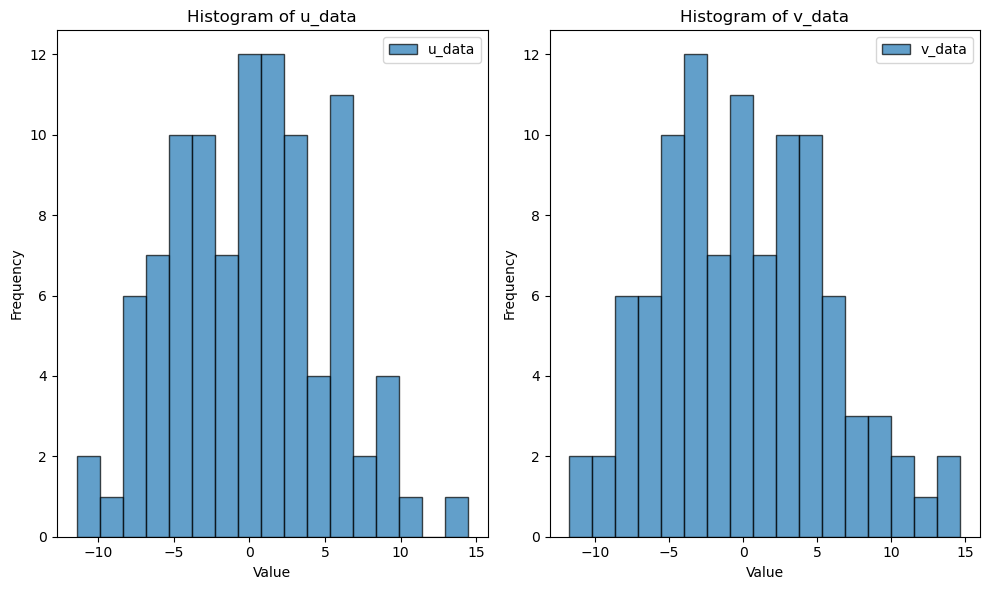

In [8]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's show how to use MetPy Calc

In [9]:
from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [11]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

windspeed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))
windspeed

Magnitude,[7.349764758102366 6.662121348309235 8.506519974121694 5.415437046956012 4.935975311682743 5.992376486373621 10.125973153276044 7.321357839226664 5.026325658049476 1.423521488336086 8.693104693432572 7.750849274456495 3.4054530936564182 3.9710545256627907 10.650265220802286 6.816005215113161 7.590697293987007 2.091365383147827 6.311114577015559 2.8625032527291756 4.528800192143511 8.866200813546989 8.503736972985376 3.7436116547735065 5.0726110934584145 5.038291085451696 7.227851537258303 10.263038002996897 8.824951588315635 6.077500099138478 6.505189346449913 2.7526798556606917 1.2471283368315456 5.118707419611475 10.966370283748706 5.516416421785082 5.824597180945949 6.251973446715685 12.300105814444725 4.915654412926562 10.023765958902638 6.881871000104925 7.186519618558573 9.759323732829444 4.1384586673019275 10.792783800610305 0.5753796593276105 3.8618538847010866 10.622553982249464 4.089511442841965 8.612750809985902 6.20946477752976 14.954669054726171 1.7119388685308332 3.674727448937895 11.659970083323433 4.294175879590604 5.902305885245403 1.394742812118627 9.414882401432957 9.46033510520371 8.071481123131406 7.344367310334781 5.533503255878472 7.683213552390208 7.272073578524238 5.343488828928036 8.030723805575922 7.884008040432727 14.021483913229948 1.6349718572007252 4.251894569150889 9.455623975113227 4.605250985120657 8.47471899489689 14.654585708915082 4.236334452843257 5.607010664822687 15.36336296170586 4.470559687838191 13.724447023726393 1.981497492691223 3.8437410991202676 5.427429089007144 7.0353096102587305 8.676898142550868 4.584340397297541 9.493800190794706 2.6926739159217057 0.36472754802799773 10.248530151183742 2.94697770657408 11.41926823151612 5.031875087756631 1.114920890891923 6.548819351503985 8.675016893799102 13.423714263914816 7.6185321811356514 8.98243029093037]
Units,meter/second


# lets try to find Ch4 max, first lets make an array of random ch4 data

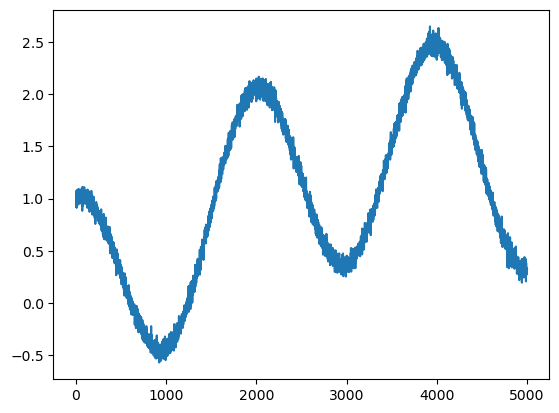

In [14]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05

plt.plot(data)


In [15]:
from backtrack import findmaxCH4

In [16]:
%%time
max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4(data, t)

CPU times: user 244 µs, sys: 103 µs, total: 347 µs
Wall time: 339 µs


#### findmaxCH4 has been tested by Bryan, seems to work as intended

# Backtrack Function Testing

In [17]:
from backtrack import backtrack

## These variables are all made up. Just looking to see what it requires and see if it runs. 

In [18]:
sensor_x = 1
sensor_y = 2

pathmax = 3.2
dt = 1

ijk_start = 2

u_sonic = u_data
v_sonic = v_data

In [19]:
np.size(ijk_start)

1

In [20]:
%%time
backtrack(ijk_start, u_sonic, v_sonic, dt, sensor_x, sensor_y, pathmax)

CPU times: user 46 µs, sys: 1 µs, total: 47 µs
Wall time: 49.1 µs


(0.19892212032823364, -6.80536985317612)

### Pathmax Function

In [24]:
from backtrack import pathmax

In [25]:
factor_x = 0.5
x_width = 11
factor_y = 0.25
y_width = (30, 2)


In [26]:
pathmax(factor_x, x_width, factor_y, y_width)

TypeError: All inputs must have the same length.

In [27]:
y_width = 30

In [28]:
pathmax(factor_x, x_width, factor_y, y_width)

5.5

### Data ingester for B Travis

In [ ]:
create_input_data_for_bryan(x, num_met_sensors =1, num_sensors = 3):
    '''
    This function uses numpy arrays as input

    x[0]: same shape as encoder.values where each dimension is sample, sensor, time, variable ,mask 
    x[1]: same shape as decoder.values where each dimension is sample, pot_leak, target_time, variable, mask

    The variable should have a length of 8: ['ref_distance', 'ref_azi_sin', 'ref_azi_cos', 'ref_elv', 'u', 'v', 'w', 'q_CH4']
    '''
    encoder = x[0]
    decoder = x[1] # think unessary

    # This is just used for debugging. Since it's outside of the loop, should not affect runtime that much.
    print('encoder shape (x)', np.shape(encoder))
    print('decoder shape (y)', np.shape(decoder))
        
    # Collapse on time. Time steps should be constant for this model. 
    max_time = np.max(encoder, axis=2) # this can be changed to 80th percentile or w/e

    # make xarray datasets
    dataset = xr.Dataset({"data": (["sample", "sensor", "variables"], max_time)})
    
    for i in dataset.sample:
        # pulling the information from the sensors, distance, azi_sin and azi_cos and ch4
        ref_dist = dataset.isel(sample=i).data.values[:, 0]
        azi_sin  = dataset.isel(sample=i).data.values[:, 1]
        azi_cos  = dataset.isel(sample=i).data.values[:, 2]
        ref_elevation  = dataset.isel(sample=i).data.values[:, 3]
        u  = dataset.isel(sample=i).data.values[:, 4]
        v  = dataset.isel(sample=i).data.values[:, 5]
        ch4_data = dataset.isel(sample=i).data.values[:, 7]

        combined_sensor = np.column_stack((ref_dist, azi_sin, azi_cos, ref_elevation, u, v, ch4_data))

        # Number of met sensors is set constant here. This is one spot where some more clever logic might be needed
        combined_sensor = combined_sensor[num_met_sensors:] # drops the met sensor, in this case it's the first row. 
        drop_masked_sensor =  combined_sensor[:num_sensors, :] # pulling the first three sensors

        # This needs to be pathmaxx'ed and backtrack'd 
        u_export = u[0]
        v_export = v[0]
        x_, y_   = polar_to_cartesian(drop_masked_sensor[:, 0], drop_masked_sensor[:, 1], drop_masked_sensor[:, 2])
        z_data   = drop_masked_sensor[:, 3]
        ch4_data = drop_masked_sensor[:, 6]
        
        output_matrix = np.column_stack((x_, y_, z_data, ch4_data))
        flattened_matrix = output_matrix.flatten()
        export = np.append(flattened_matrix.reshape(-1, num_sensors*4), [u_export, v_export])

    return export